In [85]:
import pandas as pd 
import numpy as np 
import seaborn as sns


In [86]:
#load our data in dataframe
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
# Load test set
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [88]:
#we check the columns:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [89]:
#remove the id since not really relevant to our analysis
df=df.drop('Id',axis=1)
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [90]:
#check info of our data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [91]:
# 1.Drop 'Id' :
test_id = test_df['Id']  
test_df = test_df.drop('Id', axis=1)
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [92]:
numbers=df.select_dtypes(include=np.number)
numbers.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [93]:
numbers_test=df.select_dtypes(include=np.number)
numbers_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [94]:
#cleaning our data:
#1.look for missing data:
df.isna().sum()


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

<Axes: xlabel='LotFrontage', ylabel='Count'>

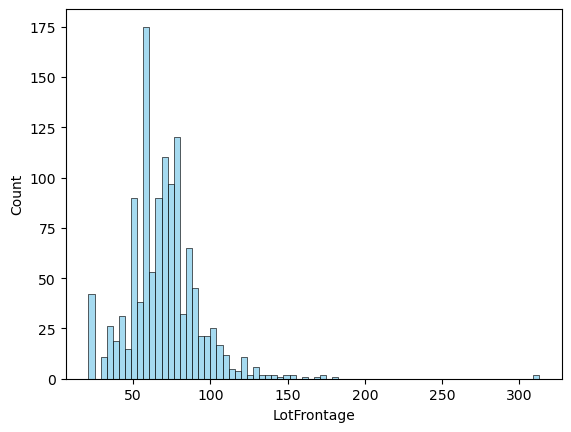

In [95]:
#2.visualize the missing data histogram:
sns.histplot(data=df,x='LotFrontage',color='skyblue')
#we can observe that lot frontage is skwed toward the right

In [96]:
#3.fill the data
#since data is skewed it would be better to use the median so as not to be affected by outliers
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [97]:
#check if the operation was successful
df['LotFrontage'].isna().any()

False

<Axes: xlabel='GarageYrBlt', ylabel='Count'>

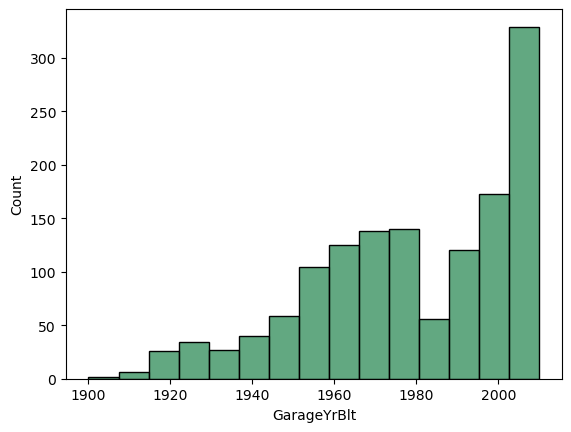

In [98]:
#we do the same for the other missing value column:
sns.histplot(data=df,x='GarageYrBlt',color='seagreen')

In [99]:
#we'll also use the median to fill the missing values :
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageYrBlt'].isna().any()

False

In [100]:
# 2. Fill missing values using median of the train (need same transformation so that it's relevant)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(df['LotFrontage'].median())
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

<Axes: xlabel='SalePrice', ylabel='Count'>

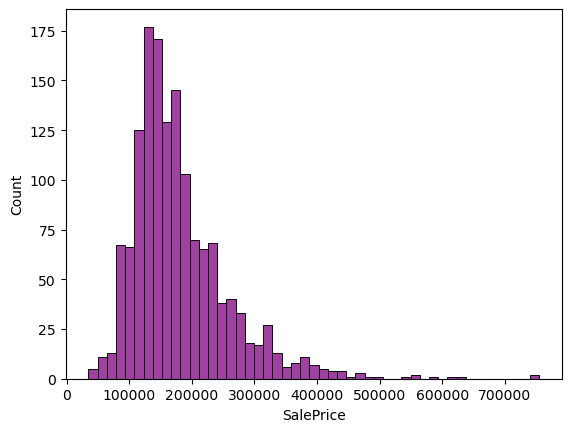

In [101]:
#feature engineering:
#now let's take a look at our target variable:sale price
sns.histplot(data=df,x='SalePrice',color='purple')
#very skewed

In [102]:
#sale price are skewed to the right:
#now let's study the correlation of the target column with other columns: 
corr_matrix=numbers.corr()
corr_matrix.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


In [103]:
#let's check which columns are most correlated with price:
top_correlated=corr_matrix['SalePrice'].abs().sort_values(ascending=False)
top_correlated.head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [104]:
top_correlated=top_correlated.iloc[0:12].index #retrieve top 12 correlated values 
top_correlated=top_correlated.tolist()
top_correlated


['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt']

<Axes: >

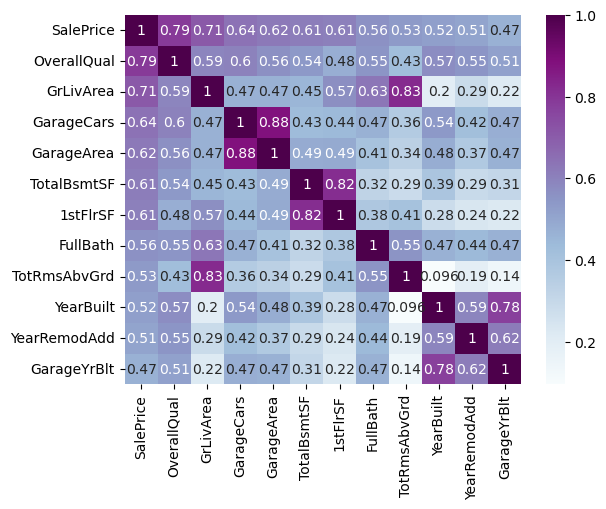

In [105]:
#let's create subset dataframe containing only the top correlated features with price
top_correlated_features=df[top_correlated]
sns.heatmap(data=top_correlated_features.corr(),annot=True,cmap='BuPu')

In [106]:
#we can notice that garage cars and garage area they both are heavily correlated we can feature engineer those by having more relevant feature that take them both into account:
df['GarageAreaPerCar']=df.apply(lambda x:x['GarageArea']/x['GarageCars'] if x['GarageCars']!=0 else 0,axis=1)


In [107]:
df['GarageAreaPerCar']=round(df['GarageAreaPerCar'],2)
df['GarageAreaPerCar']

0       274.00
1       230.00
2       304.00
3       214.00
4       278.67
         ...  
1455    230.00
1456    250.00
1457    252.00
1458    240.00
1459    276.00
Name: GarageAreaPerCar, Length: 1460, dtype: float64

In [108]:
#let's do the same for total rooms above ground and Gr living area:
df['AreaPerRoom']=df.apply(lambda x:x['GrLivArea']/x['TotRmsAbvGrd'] if x['TotRmsAbvGrd']!=0 else 0,axis=1)
df['AreaPerRoom'].head()

0    213.750000
1    210.333333
2    297.666667
3    245.285714
4    244.222222
Name: AreaPerRoom, dtype: float64

In [109]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAreaPerCar,AreaPerRoom
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,274.00,213.750000
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,230.00,210.333333
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,304.00,297.666667
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,214.00,245.285714
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,278.67,244.222222


In [110]:
# test_set:Feature engineering:same added features
test_df['GarageAreaPerCar'] = test_df.apply(lambda x: x['GarageArea'] / x['GarageCars'] if x['GarageCars'] != 0 else 0, axis=1)
test_df['AreaPerRoom'] = test_df.apply(lambda x: x['GrLivArea'] / x['TotRmsAbvGrd'] if x['TotRmsAbvGrd'] != 0 else 0, axis=1)

In [111]:
#now let's feature enginner categorical data:
categorical=df.select_dtypes(include='object')
#drop all features that have missing values
cd=categorical.isna().any()
print(cd.head())
cd=cd[cd==True]
print(cd.head())
#apply same transformation to the test set:since we want to drop similar columns we'll drop the columns that training set dropped:
categorical_test=test_df.select_dtypes(include='object')
new_categorical_test=categorical_test.drop(columns=cd.index)


MSZoning       False
Street         False
Alley           True
LotShape       False
LandContour    False
dtype: bool
Alley           True
MasVnrType      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
dtype: bool


In [112]:
new_categorical=categorical.drop(columns=cd.index)
new_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [113]:
#hot encoding or relevant features:
encoded_features = pd.get_dummies(new_categorical)
encoded_features.head()


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [114]:
encoded_features_test=pd.get_dummies(new_categorical_test)
encoded_features_test.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [115]:
#let's drop original categorical columns first:
df=df.drop(columns=categorical.columns)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GarageAreaPerCar,AreaPerRoom
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,0,2,2008,208500,274.00,213.750000
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,5,2007,181500,230.00,210.333333
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,9,2008,223500,304.00,297.666667
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,272,0,0,0,0,2,2006,140000,214.00,245.285714
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,12,2008,250000,278.67,244.222222


In [116]:
test_df=test_df.drop(columns=categorical.columns)
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageAreaPerCar,AreaPerRoom
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,120,0,0,6,2010,730.0,179.200000
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,36,0,0,0,0,12500,6,2010,312.0,221.500000
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,34,0,0,0,0,0,3,2010,241.0,271.500000
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,36,0,0,0,0,0,6,2010,235.0,229.142857
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,82,0,0,144,0,0,1,2010,253.0,256.000000


In [117]:
#concatenat the new encoded features with the dataframe
df=pd.concat([df,encoded_features],axis=1)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


In [118]:
test_df=pd.concat([test_df,encoded_features_test],axis=1)

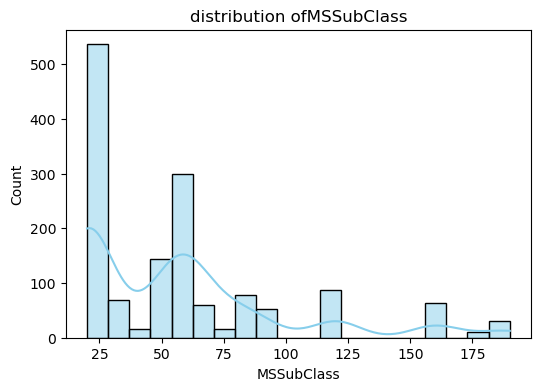

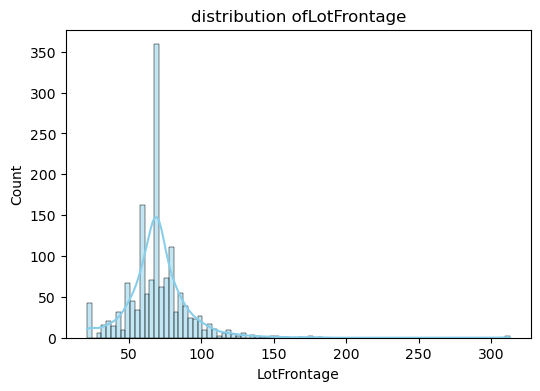

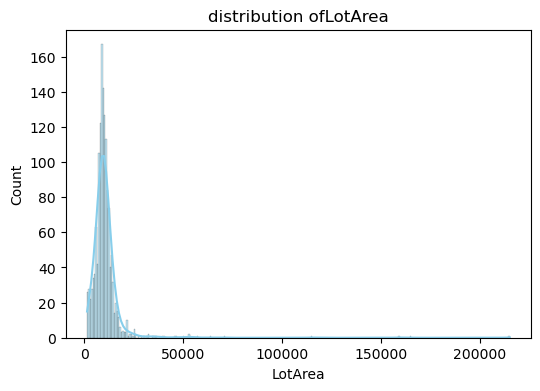

In [119]:
#exploring our data:
#visualize the distribution of each numeric variable:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols=df.select_dtypes(include='number').columns[:3]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,color='skyblue')
    plt.title(f"distribution of{col}")
plt.show()



In [120]:

#we remember that our target variable price was very skwed to the right let's apply log transformation:
df['price_log']=np.log(df['SalePrice'])
df['price_log']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: price_log, Length: 1460, dtype: float64

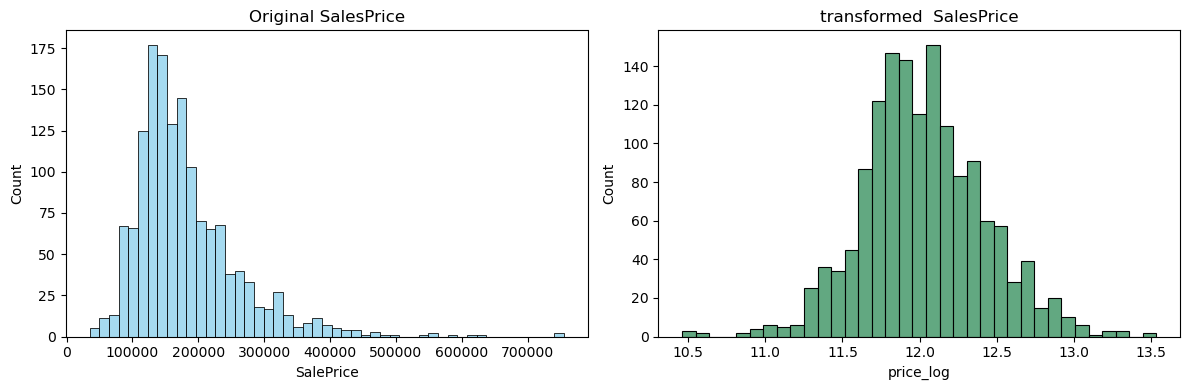

In [121]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=df,x='SalePrice',ax=axes[0],color='skyblue')#1st subplot
axes[0].set_title('Original SalesPrice')
sns.histplot(data=df,x='price_log',ax=axes[1],color='seagreen')#2nd subplot
axes[1].set_title('transformed  SalesPrice')
plt.tight_layout()
plt.show()
#here we notice clearly how the log version is much more symetric,follows almost a normal distribution

In [122]:
X_train=df.drop(['SalePrice','price_log'],axis=1)
y_train=df['price_log']


In [123]:
# let's split our data into training and cross validation test in order to test locally although this could lead to data leakage it will at least give us an aprroximate vision:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,train_size=0.7,shuffle=True,random_state=123)
print(f"X_train shape:{X_train.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"X_cv shape:{X_cv.shape}")
print(f"y_cv shape:{y_cv.shape}")

X_train shape:(1021, 220)
y_train shape:(1021,)
X_cv shape:(439, 220)
y_cv shape:(439,)


In [124]:
#let's scale our data:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled

array([[-0.64215458, -0.66154281, -0.5049324 , ..., -0.10905486,
         0.4735194 , -0.30520117],
       [-0.87889039,  0.03249255, -0.18313937, ..., -0.10905486,
         0.4735194 , -0.30520117],
       [-0.87889039,  0.68025888, -0.16923661, ..., -0.10905486,
        -2.11184589, -0.30520117],
       ...,
       [-0.87889039, -0.01377648,  1.06100525, ..., -0.10905486,
         0.4735194 , -0.30520117],
       [ 0.65989238,  0.03249255, -0.19085185, ..., -0.10905486,
         0.4735194 , -0.30520117],
       [-0.16868296, -0.43019769, -0.43897041, ..., -0.10905486,
         0.4735194 , -0.30520117]])

In [125]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
250,30,55.0,5350,3,2,1940,1966,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
228,20,70.0,8521,5,5,1967,1967,0.0,842,0,...,False,False,False,True,False,False,False,False,True,False
40,20,84.0,8658,6,5,1965,1965,101.0,643,0,...,False,False,False,True,True,False,False,False,False,False
428,20,64.0,6762,7,5,2007,2007,108.0,664,0,...,False,True,False,False,False,False,False,False,False,True
278,20,107.0,14450,9,5,2006,2007,315.0,0,0,...,False,True,False,False,False,False,False,False,False,True


Basically it's adjusting the columns of training set to be the same number of test set ,if one column is missing fill it with 0.
So when scaling data we will have same number of feature to apply transformation

In [126]:
train_columns=X_train.columns

test_df = test_df.reindex(columns=train_columns, fill_value=0)

In [127]:
X_test_scaled=scaler.transform(test_df)
X_test_scaled[:10]

array([[-0.87889039,  0.49518279,  0.13155007, ..., -0.10905486,
         0.4735194 , -0.30520117],
       [-0.87889039,  0.54145181,  0.39996463, ..., -0.10905486,
         0.4735194 , -0.30520117],
       [ 0.06805285,  0.21756864,  0.35561787, ..., -0.10905486,
         0.4735194 , -0.30520117],
       ...,
       [ 0.06805285, -0.29139062, -0.19521549, ..., -0.10905486,
         0.4735194 , -0.30520117],
       [-0.87889039,  0.72652791, -0.01518999, ..., -0.10905486,
         0.4735194 , -0.30520117],
       [-0.87889039,  0.03249255, -0.19541845, ..., -0.10905486,
         0.4735194 , -0.30520117]])

In [128]:
X_cv_scaled=scaler.transform(X_cv)
X_cv

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
147,60,69.0,9505,7,5,2001,2001,180.0,0,0,...,False,False,False,True,False,False,False,False,True,False
676,70,60.0,9600,4,2,1900,1950,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1304,160,32.0,3363,7,5,2004,2004,117.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1372,60,75.0,9750,7,6,1998,1998,0.0,975,0,...,False,False,False,True,False,False,False,False,True,False
1427,50,60.0,10930,5,6,1945,1950,0.0,580,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,70,60.0,6882,6,7,1914,2006,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
637,190,50.0,6000,5,4,1954,1954,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
753,60,80.0,10240,8,5,2005,2005,178.0,0,0,...,False,False,False,True,False,False,False,False,True,False
554,60,85.0,10625,7,5,2003,2004,292.0,866,0,...,False,False,False,True,False,False,False,False,True,False


In [129]:
#let's first instansiate our model:
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
base_tree=DecisionTreeRegressor(random_state=123,min_samples_leaf=5)
dt=base_tree
dt.fit(X_train_scaled,y_train)
y_pred_dummmy=dt.predict(X_cv_scaled)
rmse_dummy=MSE(y_pred_dummmy,y_cv)**(1/2)
print(f" the baseline rmse of the model is:",rmse_dummy)#the error shouldn't be higher than this



 the baseline rmse of the model is: 0.19699983392862888


In [130]:
#let's try out different ensemble tree methods and pick which one is the best based on accuracy and RMSE score(even if XG boost most likely to be the best ):
models=[("bagging regressor",BaggingRegressor(estimator=base_tree,n_estimators=130,random_state=1)),
        ("random Forest",RandomForestRegressor(n_estimators=10,random_state=1)),
         ("XG boost",XGBRegressor()),
          ]

In [131]:
rmses=[]
predictions=[]
for name,model in models :
    print(f"fitting the {name} model ...")
    model.fit(X_train_scaled,y_train)
    print("predicting the output ...")
    y_pred=model.predict(X_cv_scaled)
    predictions.append(y_pred)
    print("computing the rmse of the model")
    rmse_bc=MSE(y_pred,y_cv)**(1/2)
    rmses.append(rmse_bc)
    print(f"the rmse of {name} is:{rmse_bc}")



fitting the bagging regressor model ...
predicting the output ...
computing the rmse of the model
the rmse of bagging regressor is:0.1400812526879713
fitting the random Forest model ...
predicting the output ...
computing the rmse of the model
the rmse of random Forest is:0.14628739834935697
fitting the XG boost model ...
predicting the output ...
computing the rmse of the model
the rmse of XG boost is:0.13680839996142116


In [132]:
best_model=models[np.argmin(rmses)]#pick index of lowest rmse 
print(f"the best model is :{best_model[0]}")

the best model is :XG boost


In [133]:
xgb=XGBRegressor()
xgb.fit(X_train_scaled,y_train)
y_pred=xgb.predict(X_cv_scaled)
print(y_pred[:10])

[12.323016 11.633581 11.819454 12.423671 11.83039  12.308901 12.601849
 11.55722  11.771397 11.490982]


In [134]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error as MSE 
xgb_params={
    'max_depth':[3,5,7],
    'learning_rate':[0.1,0.01,0.001],
    'subsample':[0.5,0.7,1],
    'n_estimators':[100,350,500]
}
random_search=RandomizedSearchCV(estimator=xgb,
                                 param_distributions=xgb_params,
                                 n_jobs=-1,
                                  scoring='neg_mean_absolute_error',
                                  cv=5,
                                  n_iter=10,
                                  verbose=1)

In [135]:
random_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 350, 500],
                                        'subsample': [0.5, 0.7, 1]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [136]:
best_model=random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=350,
             n_jobs=None, num_parallel_tree=None, ...)

In [137]:
best_params=random_search.best_params_
best_params

{'subsample': 1, 'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.1}

In [138]:
y_pred=best_model.predict(X_cv_scaled)

In [139]:
rmse_test=MSE(y_pred,y_cv)**(1/2)
print("the rmse of our final model is:",rmse_test)

the rmse of our final model is: 0.28990146838564695


In [140]:
y_pred=best_model.predict(X_test_scaled)

In [142]:
test_df=pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [143]:
submission=pd.DataFrame({
    'Id':test_df["Id"],
    'SalePrice':y_pred
})
submission.to_csv('submission.csv',index=False)